# BOTTLENECK - Analyses des stocks et des ventes


# Introduction

In [1]:
## Importation des modules & librairies

import numpy as np # Calculs numériques et opérations mathématiques
import pandas as pd # Manipulation et analyse de données
import matplotlib.pyplot as plt # Création de graphiques et visualisations
import plotly.express as px # Visualisation interactive des données
import seaborn as sns # Visualisations statistiques avancées
import random # Génération de nombres aléatoires et manipulation aléatoire de données
import warnings # Gestion des avertissements

## Paramètres d'affichages
pd.set_option('display.max_columns', None) # Afficher l'intégralité des variables des DataFrames
warnings.filterwarnings("ignore", category=UserWarning, message="Unknown extension is not supported and will be removed*") # Gestion des alertes

In [2]:
## Mise en place des fonctions
def explore_dataframe(data_to_analyse):
    """
    Effectue une analyse exploratoire basique sur un dataframe donné.

    Parameters:
    data_to_analyse (DataFrame): Le dataframe à analyser.
    """
    # Dimensions du dataframe
    print('*' * 40 + " DIMENSIONS " + '*' * 44)
    print(f"Le dataframe comporte {data_to_analyse.shape[1]} variable(s) pour {data_to_analyse.shape[0]} observation(s).")

    # Typologies des variables
    print('*' * 40 + " TYPOLOGIES " + '*' * 44)
    for col, dtype in data_to_analyse.dtypes.items():
        print(f"{col} : {dtype}")

    # Effectifs des variables
    print('*' * 40 + " EFFECTIFS " + '*' * 45)
    for col, count in data_to_analyse.describe(include='all').loc['count'].items():
        print(f"{col} : {count}")

    # Valeurs nulles dans le dataframe
    print('*' * 40 + " VALEURS NULLES " + '*' * 40)
    for col, count in data_to_analyse.isnull().sum().items():
        print(f"{col} : {count}")

    # Duplicats dans le dataframe
    print('*' * 40 + " DUPLICATS " + '*' * 45)
    for col, count in data_to_analyse[data_to_analyse.duplicated()].count().items():
        print(f"{col} : {count}")


In [3]:
## Importation des données initiales
erp_data = pd.read_excel("./erp.xlsx")
web_data = pd.read_excel("./web.xlsx")
table_liaison =  pd.read_excel("./table_liaison.xlsx")

# Analyses exploratoires et préparation des données

## Données extraites du fichier ERP

In [4]:
## Analyse exploratoire
explore_dataframe(erp_data)

**************************************** DIMENSIONS ********************************************
Le dataframe comporte 6 variable(s) pour 825 observation(s).
**************************************** TYPOLOGIES ********************************************
product_id : int64
onsale_web : int64
price : float64
stock_quantity : int64
stock_status : object
purchase_price : float64
**************************************** EFFECTIFS *********************************************
product_id : 825.0
onsale_web : 825.0
price : 825.0
stock_quantity : 825.0
stock_status : 825
purchase_price : 825.0
**************************************** VALEURS NULLES ****************************************
product_id : 0
onsale_web : 0
price : 0
stock_quantity : 0
stock_status : 0
purchase_price : 0
**************************************** DUPLICATS *********************************************
product_id : 0
onsale_web : 0
price : 0
stock_quantity : 0
stock_status : 0
purchase_price : 0


In [5]:
## Préparation des données

# Modifier la typologie des variables
erp_data['product_id'] = erp_data['product_id'].astype(object)

# Aperçu du dataframe
erp_data.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [6]:
## Vérifications de la cohérence des données

# Contrôle de l'unicité des valeurs au sein de la variable 'product_id'
product_id_duplicate = erp_data.duplicated(subset=['product_id']).sum()
print(f"Il y a {product_id_duplicate} doublons au sein de la variable 'product_id'.")
print("")

# Contrôle des valeurs uniques présentes au sein de la variable 'stock_status'
valeurs_unique_stock_status = erp_data['stock_status'].unique()
print(f"Les valeurs uniques de la variable 'stock_status' sont : {valeurs_unique_stock_status}.")

Il y a 0 doublons au sein de la variable 'product_id'.

Les valeurs uniques de la variable 'stock_status' sont : ['instock' 'outofstock'].


In [7]:
## Contrôle des informations relatives à l'état des stocks
# La variable 'stock_status' semble liée à la variable 'stock_quantity'

# Mise en place d'une variable de contrôle 'stock_status_2'
erp_data['stock_status_2'] = erp_data['stock_quantity'].apply(lambda x: 'outofstock' if x <= 0 else 'instock')
# Mise en place des variables de contrôle complémentaires
observations_coherentes = 0 # Nombre de données identiques
observations_non_coherentes = 0 # Nombre de données non-identiques
liste_des_incoherences = [] # Liste des données non-identiques

# Contrôle de la concordance des données entre 'stock_status' et la variable de contrôle
if (erp_data['stock_status'] == erp_data['stock_status_2']).all():
    print(" ✅ Les valeurs des variables 'stock_status' et 'stock_quantity' sont cohérentes.")
    print('')
else:
    print(" ❌ Certaines valeurs des variables 'stock_status' et 'stock_quantity' ne sont pas cohérentes.")
    print('')

## Affichage des observations non cohérentes

# Calcul du nombre d'observations non cohérentes
for index, observation in erp_data.iterrows():
    if observation['stock_status'] == observation['stock_status_2']:  # Valeurs identiques
        observations_coherentes += 1
    else : # Valeurs non identiques
        observations_non_coherentes += 1
        liste_des_incoherences.append(observation) # Liste des valeurs incohérentes

# Aperçu des résultats
print(f'Détection de {observations_non_coherentes} valeurs incohérentes, pour {observations_coherentes} valeurs cohérentes.')
print('')
pd.DataFrame(liste_des_incoherences)

 ❌ Certaines valeurs des variables 'stock_status' et 'stock_quantity' ne sont pas cohérentes.

Détection de 2 valeurs incohérentes, pour 823 valeurs cohérentes.



,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock


In [8]:
## Correction des valeurs incohérentes

# Product_id -> 4039 | Index -> 4
erp_data.loc[4, 'stock_status'] = 'instock' # car stock_quantity -> 3
# Product_id -> 4885 | Index -> 398
erp_data.loc[398, 'stock_status'] = 'outofstock' # car stock_quantity -> 0

# Vérifications
if (erp_data['stock_status'] == erp_data['stock_status_2']).all():
    print(" ✅ Les valeurs des variables 'stock_status' et 'stock_quantity' sont désormais cohérentes.")
    print('')
else:
    print(" ❌ Certaines valeurs des variables 'stock_status' et 'stock_quantity' ne sont toujours pas cohérentes.")
    print('')

# Suppression de la variable 'stock_status_2'
if observations_non_coherentes == 0 :
  erp_data.drop(columns='stock_status_2', inplace=True)

 ✅ Les valeurs des variables 'stock_status' et 'stock_quantity' sont désormais cohérentes.



In [9]:
## Contrôle de la conformité des informations relatives au prix

# Calcul du nombre de prix d'achat non renseigné
purchase_non_renseigne = erp_data['purchase_price'].isnull().sum()
print("Nombres d'articles dont le prix d'achat n'est pas renseigné : {}.".format(purchase_non_renseigne))
print("")

# Calcul du nombre de prix d'achat produit incohérents
purchase_negatifs = erp_data.loc[erp_data['purchase_price'] <= 0]
if purchase_negatifs.empty:
    print("Les produits sont tous vendus avec un prix supérieur au prix d'achat.")
    print('')
else:
    print("Certains produits ont un prix inférieur au prix d'achat.")
    print('')
    pd.DataFrame(purchase_negatifs).head()

# Calcul du nombre de prix non renseigné
prix_non_renseigne = erp_data['price'].isnull().sum()
print("Nombres d'articles dont le prix n'est pas indiqué : {}.".format(prix_non_renseigne))
print("")

# Calcul du nombre de prix nul (égal à zéro)
prix_nul = erp_data[erp_data['price'] == 0]
print("Nombres d'articles dont le prix est incohérent (égale à zéro) : {}.".format(prix_nul['product_id'].count()))
print("")

# Calcul du nombre de prix négatifs (inférieurs à zéro)
prix_negatifs = erp_data[erp_data['price'] < 0]
print("Nombres d'articles dont le prix est incohérent (inférieur à zéro) : {}.".format(prix_negatifs['product_id'].count()))
print("")

# Création d'un dataframe excluant les prix incohérents
prix_coherents_data = erp_data[erp_data['price'] >= 0]

# Aperçu des produits dont le prix est incohérent (inférieur à zéro)
pd.DataFrame(prix_negatifs)

Nombres d'articles dont le prix d'achat n'est pas renseigné : 0.

Les produits sont tous vendus avec un prix supérieur au prix d'achat.

Nombres d'articles dont le prix n'est pas indiqué : 0.

Nombres d'articles dont le prix est incohérent (égale à zéro) : 0.

Nombres d'articles dont le prix est incohérent (inférieur à zéro) : 3.



,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
151,4233,0,-20.0,0,outofstock,10.33,outofstock
469,5017,0,-8.0,0,outofstock,4.34,outofstock
739,6594,0,-9.1,19,instock,4.61,instock


Ces trois observations sont problématiques puisque un produit ne peut pas avoir un prix négatif.

En effet, la vente à perte est illégale en France.

**Cette information sera donc transmise au service concerné.**

Dans l'hypothèse ou l'on souhaiterait supprimer ces références produits de notre analyse :

*erp_data.drop(erp_data[erp_data['price'] < 0].index, inplace=True)*

In [10]:
## Prix d'achat des produits

# Aperçu du prix d'achat minimum
purchase_minimum = erp_data['purchase_price'].min()
print("Le plus faible prix d'achat pour un produit est : {} €.".format(purchase_minimum))
# Aperçu du prix d'achat maximum
purchase_maximum = erp_data['purchase_price'].max()
print("Le prix d'achat le plus élevé pour un produit est : {} €.".format(purchase_maximum))

Le plus faible prix d'achat pour un produit est : 2.74 €.
Le prix d'achat le plus élevé pour un produit est : 137.81 €.


In [11]:
## Aperçu du prix minimum proposé par le catalogue
valeur_minimum = prix_coherents_data['price'].min()
print("L'article le moins cher a pour montant : {} €.".format(valeur_minimum))
prix_coherents_data.loc[[prix_coherents_data['price'].idxmin()]]

L'article le moins cher a pour montant : 5.2 €.


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
700,6129,1,5.2,68,instock,2.74,instock


In [12]:
## Aperçu du prix maximum proposé par le catalogue
valeur_maximum = erp_data['price'].max()
print("L'article le plus cher a pour montant : {} €.".format(valeur_maximum))
prix_coherents_data.loc[[prix_coherents_data['price'].idxmax()]]

L'article le plus cher a pour montant : 225.0 €.


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
208,4352,1,225.0,0,outofstock,137.81,outofstock


In [13]:
## Contrôle de la conformité des informations relatives au stock

# Calcul du nombre d'articles dont le stock n'est pas renseigné
stock_non_renseigne = erp_data['stock_quantity'].isnull().sum()
print("Nombre d'article avec un stock non renseigné : {}.".format(stock_non_renseigne))
print("")

# Calcul du nombre d'articles dont le stock est négatif (inférieur à zéro)
stock_negatif = erp_data[erp_data['stock_quantity'] < 0]
print("Nombres d'articles avec un stock négatifs (inférieur à zéro) : {}.".format(stock_negatif['product_id'].count()))
print("")

# Aperçu des produits dont le stock est incohérent (inférieur à zéro)
pd.DataFrame(stock_negatif)

Nombre d'article avec un stock non renseigné : 0.

Nombres d'articles avec un stock négatifs (inférieur à zéro) : 2.



,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
449,4973,0,10.0,-10,outofstock,4.96,outofstock
573,5700,1,44.5,-1,outofstock,22.30,outofstock


Malgré une absence de stock, le produit dont l'identifiant est '5700' est proposé à la vente en ligne.

**Cette information sera donc transmise au service concerné.**

In [14]:
## Aperçu du stock minimum pour un produit
stock_minimum = erp_data.loc[erp_data['stock_quantity'] >= 0]['stock_quantity'].min()
print("Le stock le moins élevé pour un produit est : {}.".format(stock_minimum))

Le stock le moins élevé pour un produit est : 0.


In [15]:
## Aperçu du stock maximum pour un produit
stock_maximum = erp_data.loc[erp_data['stock_quantity'] >= 0]['stock_quantity'].max()
print("Le stock le plus élevé pour un produit est : {}.".format(stock_maximum))

Le stock le plus élevé pour un produit est : 145.


In [16]:
## Informations relatives à la vente en ligne

# Calcul du nombre de produit dont le statut en ligne n'est pas renseigné
valeur_non_renseigne = erp_data['onsale_web'].isnull().sum()
print("Nombre de produit dont le statut en ligne n'est pas renseigné : {}.".format(valeur_non_renseigne))
print("")

# Calcul du nombre de valeurs uniques au sein de la variable 'onsale_web'
valeurs_uniques = erp_data['onsale_web'].unique()
print(f"Les valeurs uniques de la colonne 'onsale_web' sont : '{valeurs_uniques}'")

Nombre de produit dont le statut en ligne n'est pas renseigné : 0.

Les valeurs uniques de la colonne 'onsale_web' sont : '[1 0]'


In [17]:
## Conversion de la variable 'onsale_web' en type 'boolean' car variable binaire.

# Vérifications préalables
boolean_or_not = erp_data['onsale_web'].isin([0, 1]).all()

# Conversion
if boolean_or_not == True :
  erp_data['onsale_web'] = erp_data['onsale_web'].astype(bool)

In [18]:
## Disponibilités à l'achat des produits en ligne

# Calcul du nombre de produit en vente sur le site
is_onsale = erp_data.loc[(erp_data['onsale_web'] == True)]['product_id'].nunique()
print(f"{is_onsale} produits sont en ventes sur internet.")
print('')

# Calcul du nombre de produit indisponible le site
is_not_onsale = erp_data.loc[(erp_data['onsale_web'] != True)]['product_id'].nunique()
print(f"{is_not_onsale} produits ne sont pas disponibles sur internet.")
print('')

# Calcul du nombre de produit en ventes sur internet malgré l'absence de stock
is_onsale_without_stock = erp_data.loc[(erp_data['onsale_web'] == True) & (erp_data['stock_quantity'] == 0)]['product_id'].nunique()
print(f"{is_onsale_without_stock} produits sont en ventes sur internet malgré l'absence de stock.")

716 produits sont en ventes sur internet.

109 produits ne sont pas disponibles sur internet.

47 produits sont en ventes sur internet malgré l'absence de stock.


In [19]:
## Re-organisation des variables pour une meilleur lisibilité
new_order = ['product_id', 'price', 'purchase_price','stock_status','stock_quantity','onsale_web']
erp_data = erp_data[new_order]

# Dimensions du dataframe ERP
print(f"Le dataframe ERP comporte {erp_data.shape[1]} variable(s) pour {erp_data.shape[0]} observation(s).")
print('')

# Aperçu du dataframe final
erp_data.head()

Le dataframe ERP comporte 6 variable(s) pour 825 observation(s).



,product_id,price,purchase_price,stock_status,stock_quantity,onsale_web
0,3847,24.2,12.88,instock,16,True
1,3849,34.3,17.54,instock,10,True
2,3850,20.8,10.64,outofstock,0,True
3,4032,14.1,6.92,instock,26,True
4,4039,46.0,23.77,instock,3,True


## Données extraites du fichier WEB

In [20]:
## Analyse exploratoire
explore_dataframe(web_data)

**************************************** DIMENSIONS ********************************************
Le dataframe comporte 29 variable(s) pour 1513 observation(s).
**************************************** TYPOLOGIES ********************************************
sku : object
virtual : int64
downloadable : int64
rating_count : int64
average_rating : float64
total_sales : float64
tax_status : object
tax_class : float64
post_author : float64
post_date : datetime64[ns]
post_date_gmt : datetime64[ns]
post_content : float64
product_type : object
post_title : object
post_excerpt : object
post_status : object
comment_status : object
ping_status : object
post_password : float64
post_name : object
post_modified : datetime64[ns]
post_modified_gmt : datetime64[ns]
post_content_filtered : float64
post_parent : float64
guid : object
menu_order : float64
post_type : object
post_mime_type : object
comment_count : float64
**************************************** EFFECTIFS ************************************

In [21]:
## Analyse descriptives des variables numériques
web_data.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_password,post_modified,post_modified_gmt,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,1430,1430,0.0,0.0,1430,1430,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,8.223077,NaN,1.998601,2018-08-22 03:22:17.090909184,2018-08-22 01:53:30.097902080,NaN,NaN,2020-06-20 13:59:29.781818112,2020-06-20 12:06:02.509090816,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,-56.000000,NaN,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,5.000000,NaN,2.000000,2018-02-27 20:01:12.500000,2018-02-27 19:01:12.500000,NaN,NaN,2020-06-18 10:45:05.249999872,2020-06-18 08:45:05.249999872,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,8.000000,NaN,2.000000,2018-04-19 14:56:05,2018-04-19 12:56:05,NaN,NaN,2020-08-04 09:30:06,2020-08-04 07:30:06,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,11.000000,NaN,2.000000,2019-01-31 14:35:47,2019-01-31 13:35:47,NaN,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,122.000000,NaN,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,6.721899,NaN,0.037385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [22]:
## Gestion des valeurs nulles

# Liste des variables non pertinentes
nombre_variable_supprime = 0
liste_variable_supprime = []

# Pour chaque variable du dataframe
for column in web_data.columns:
    # Calcul du nombre de valeurs uniques
    nombre_valeur_unique = web_data[column].nunique()
    liste_valeur_unique = web_data[column].unique()
    # Suppression des variables ne comportant que des valeurs nulles
    if nombre_valeur_unique <= 2 and all(value == 0 or pd.isnull(value) for value in liste_valeur_unique):
      web_data.drop(column, axis=1, inplace=True)
      nombre_variable_supprime += 1
      liste_variable_supprime.append(column)

# Aperçu des résultats
print(f"{nombre_variable_supprime} variables ne comportent que des valeurs nulles :")
for variable_delete in liste_variable_supprime:
    print(f"• {variable_delete}")
print("Ces variables seront donc mises à l'écart de notre analyse car non pertinentes.")

11 variables ne comportent que des valeurs nulles :
• virtual
• downloadable
• rating_count
• average_rating
• tax_class
• post_content
• post_password
• post_content_filtered
• post_parent
• menu_order
• comment_count
Ces variables seront donc mises à l'écart de notre analyse car non pertinentes.


In [23]:
## Gestion des variables non pertinentes

# Liste des variables non pertinentes
nombre_variable_non_pertinente = 0
liste_variable_non_pertinente = []

# Pour chaque variable du dataframe
for variable in web_data.columns:
    # Calcul du nombre de valeurs uniques
    nombre_valeur_unique_column = web_data[variable].nunique()
    liste_valeur_unique_column = web_data[variable].unique()
    # Analyse des variables ne comportant moins de 3 valeurs uniques
    if nombre_valeur_unique_column <= 2:
      nombre_variable_non_pertinente += 1
      liste_variable_non_pertinente.append(variable)
      print(f"La variable {variable.upper()} a pour valeurs uniques : {liste_valeur_unique_column}")

      # Taux de proportion pour chaque valeur unique
      for unique_valeur in liste_valeur_unique_column:
          proportion_valeur_unique = web_data[web_data[variable] == unique_valeur][variable].count() / len(web_data)
          print(f"La proportion de valeur '{unique_valeur}' au sein de la variable '{variable.upper()}' est de {proportion_valeur_unique:.2%}")
      print('')

La variable TAX_STATUS a pour valeurs uniques : [nan 'taxable']
La proportion de valeur 'nan' au sein de la variable 'TAX_STATUS' est de 0.00%
La proportion de valeur 'taxable' au sein de la variable 'TAX_STATUS' est de 47.32%

La variable POST_AUTHOR a pour valeurs uniques : [ 2. nan  1.]
La proportion de valeur '2.0' au sein de la variable 'POST_AUTHOR' est de 94.38%
La proportion de valeur 'nan' au sein de la variable 'POST_AUTHOR' est de 0.00%
La proportion de valeur '1.0' au sein de la variable 'POST_AUTHOR' est de 0.13%

La variable POST_STATUS a pour valeurs uniques : ['publish' nan]
La proportion de valeur 'publish' au sein de la variable 'POST_STATUS' est de 94.51%
La proportion de valeur 'nan' au sein de la variable 'POST_STATUS' est de 0.00%

La variable COMMENT_STATUS a pour valeurs uniques : ['closed' nan]
La proportion de valeur 'closed' au sein de la variable 'COMMENT_STATUS' est de 94.51%
La proportion de valeur 'nan' au sein de la variable 'COMMENT_STATUS' est de 0.00%

Nous faisons le choix de conserver seulement deux de ces variables.

1.   'TAX_STATUS' : Indique si le produit est soumis à une taxe.
2.   'POST_TYPE' : Indicateur du type de post (produit/attachment).

Les variables suivantes seront mise à l'écart car non pertinentes dans l'optique d'une analyse des prix et/ou des stocks.

1.   POST_AUTHOR : Auteur de la publication.
2.   POST_STATUS : Statut de la publication.
3.   COMMENT_STATUS : Statut des commentaires.
4.   PING_STATUS : Statut du ping.
5.   POST_MIME_TYPE : Illustration du produit.

In [24]:
# Suppression des variables non pertinentes pour l'analyse
variable_a_supprime = ['post_author','post_status','comment_status','ping_status','post_mime_type']
web_data = web_data.drop(variable_a_supprime, axis='columns')

Les variables suivantes seront mises à l'écart pour éviter toutes redondances d'informations :

1.   'POST_DATE_GMT' : On dispose déjà de la date de publication avec 'POST_DATE'.
2.   'POST_MODIFIED_GMT' : On dispose déjà de la date de modification de la publication avec 'POST_MODIFIED'.
3.   'POST_NAME' : On dispose déjà du nom du produit avec 'POST_TITLE'

Enfin, les variables 'GUID' et 'POST_EXCERPT' ne concernant que les publications internet (Url, descriptions produits) ne seront pas conservées.

In [25]:
# Suppression des variables non pertinentes pour l'analyse
variable_a_supprime_2 = ['post_date_gmt','post_modified_gmt','post_name','guid','post_excerpt']
web_data = web_data.drop(variable_a_supprime_2, axis='columns')

In [26]:
## Analyse du code "SKU" (identifiants des différents produits mis en ligne sur le site internet)

# Modification du titre de la variable pour une meilleur lisibilité
web_data = web_data.rename(columns={'sku': 'id_web'})

# Liste des valeurs possibles
# web_data['id_web'].unique()

# Liste des identifiants produits incohérents ou atypiques
id_web_non_valide = pd.DataFrame(web_data[web_data['id_web'].astype(str).str.len() > 5])
id_web_non_valide

,id_web,total_sales,tax_status,post_date,product_type,post_title,post_modified,post_type
272,13127-1,4.0,taxable,2020-06-09 15:42:04,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,2020-07-20 17:09:06,product
842,bon-cadeau-25-euros,7.0,NaN,2018-06-01 13:53:46,Autre,Bon cadeau de 25€,2018-06-01 14:13:57,attachment
1117,13127-1,4.0,NaN,2020-06-09 15:42:04,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,2020-07-20 17:09:06,attachment
1387,bon-cadeau-25-euros,7.0,taxable,2018-06-01 13:53:46,NaN,Bon cadeau de 25€,2018-06-01 14:13:57,product


In [27]:
# Affichage des produits concernés
web_data[web_data['id_web'] == 13127]

,id_web,total_sales,tax_status,post_date,product_type,post_title,post_modified,post_type
123,13127,5.0,taxable,2018-02-12 11:18:33,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2012,2020-08-24 18:25:02,product
713,13127,5.0,NaN,2018-02-12 11:18:33,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2012,2020-08-24 18:25:02,attachment


In [28]:
# Affichage des produits concernés
web_data[web_data['id_web'] == "13127-1"]

,id_web,total_sales,tax_status,post_date,product_type,post_title,post_modified,post_type
272,13127-1,4.0,taxable,2020-06-09 15:42:04,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,2020-07-20 17:09:06,product
1117,13127-1,4.0,NaN,2020-06-09 15:42:04,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,2020-07-20 17:09:06,attachment


La différence de référence produit semble expliquée par l'année de production du produit (2007 & 2012).

L'autre anomalie détectée semble correspondre à un Bon cadeau de 25€.

**A vérifier auprès des services concernés.**


In [29]:
# Liste des produits dont l'identifiant n'est pas renseigné
id_web_isNull = pd.DataFrame(web_data.loc[web_data['id_web'].isnull()])
print(f"Le dataframe WEB comporte {id_web_isNull.shape[0]} produit dont l'identifiant web n'est pas renseigné.")

Le dataframe WEB comporte 85 produit dont l'identifiant web n'est pas renseigné.


In [30]:
# Mise en place d'un dataframe ne contenant que les produits correctements identifiés
article_identifie = web_data[web_data['id_web'].notnull()]

# Détections des doublons
duplicates_id_web = article_identifie[article_identifie.duplicated(subset=['id_web'], keep=False)]

# Liste des valeurs uniques
duplicate_id_web_values = duplicates_id_web['id_web'].unique()

# Choix aléatoire au sein des doublons
random_id_web = random.choice(duplicate_id_web_values)

# Affichage du résultat
web_data.loc[web_data['id_web'] == random_id_web]

,id_web,total_sales,tax_status,post_date,product_type,post_title,post_modified,post_type
1353,13074,4.0,NaN,2018-02-12 14:25:28,Vin,Château de Vaudieu Châteauneuf-du-Pape L'Avenu...,2019-12-09 10:40:03,attachment
1503,13074,4.0,taxable,2018-02-12 14:25:28,Vin,Château de Vaudieu Châteauneuf-du-Pape L'Avenu...,2019-12-09 10:40:03,product


In [31]:
# Contrôle des valeurs potentielles de la variable 'post_type'
web_data['post_type'].unique()

array(['attachment', 'product', nan], dtype=object)

Les informations semblent redondantes au sein des posts de types 'product' et 'attachment'.

In [32]:
# Suppression des doublons 'attachment' et 'NaN'
web_data = web_data[web_data['post_type'] == 'product'].copy()

# Suppression de la variable 'product'
web_data = web_data.drop(['post_type'], axis='columns')
print(f"Les observations redondantes ont été supprimées.")

Les observations redondantes ont été supprimées.


In [33]:
# Liste des produits dont l'identifiant n'est pas renseigné
id_web_isNull = pd.DataFrame(web_data.loc[web_data['id_web'].isnull()])
print(f"Le dataframe WEB comporte {id_web_isNull.shape[0]} observations dont l'id_web n'est pas renseigné.")
print('')

# Liste des produits dont l'identifiant n'est pas renseigné
duplicate_web = web_data[web_data.duplicated(subset=['id_web'], keep=False)]
duplicate_web

Le dataframe WEB comporte 2 observations dont l'id_web n'est pas renseigné.



,id_web,total_sales,tax_status,post_date,product_type,post_title,post_modified
1084,NaN,-56.0,taxable,2018-08-08 11:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,2019-11-02 13:24:01
1087,NaN,-17.0,taxable,2018-07-31 12:07:23,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,2019-11-02 13:24:15


L'identifiant produit 'id_web' est bien unique pour chaque produit.

Seuls deux produits ne possèdent pas d'identifiant :
1.   Pierre Jean Villa Condrieu Jardin Suspendu 2018
2.   Pierre Jean Villa Côte Rôtie Fongeant 2017

**A voir avec le service concerné.**

Nous faisons le choix d'écarter ces deux produits pour l'instant car nous ne pourrons pas trouver de correspondance avec notre fichier de liaison.



In [34]:
## Mise à l'écart des produits sans correspondances

# Index -> 1084
web_data.drop(1084, inplace=True)
# Index -> 1087
web_data.drop(1087, inplace=True)

In [35]:
## Format des dates
web_data['post_date'] = web_data['post_date'].dt.normalize()
web_data['post_modified'] = web_data['post_modified'].dt.normalize()

In [36]:
# Re-organisation des variables pour une meilleur lisibilité
new_order_web = ['id_web', 'post_title','product_type','total_sales','tax_status','post_date','post_modified']
web_data = web_data[new_order_web]

# Dimensions du dataframe WEB
print(f"Le dataframe WEB comporte {web_data.shape[1]} variable(s) pour {web_data.shape[0]} observation(s).")
print('')

# Aperçu du dataframe final
web_data.head()

Le dataframe WEB comporte 7 variable(s) pour 714 observation(s).



,id_web,post_title,product_type,total_sales,tax_status,post_date,post_modified
2,14692,Château Fonréaud Bordeaux Blanc Le Cygne 2016,Vin,5.0,taxable,2019-03-19,2020-04-25
4,15328,Agnès Levet Côte Rôtie Maestria 2017,Vin,2.0,taxable,2019-03-27,2020-07-25
6,16515,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,Vin,10.0,taxable,2018-06-02,2020-08-27
11,16585,Xavier Frissant Touraine Sauvignon 2019,Vin,15.0,taxable,2018-02-16,2020-08-27
14,12869,Stéphane Tissot Arbois D.D. 2016,Vin,7.0,taxable,2019-03-28,2019-12-13


In [37]:
# Identification du produit le plus vendu
most_sold_product = web_data.loc[[web_data['total_sales'].idxmax()]]
most_sold_product

,id_web,post_title,product_type,total_sales,tax_status,post_date,post_modified
528,16148,Château De La Selve IGP Coteaux de l'Ardèche M...,Vin,36.0,taxable,2018-05-03,2020-08-27


In [38]:
# Identification du produit le moins vendu
less_sold_product = web_data.loc[[web_data['total_sales'].idxmin()]]
less_sold_product

,id_web,post_title,product_type,total_sales,tax_status,post_date,post_modified
24,15022,Oratoire Saint Martin Cairanne Rouge Les Douye...,Vin,0.0,taxable,2018-02-12,2020-08-27


## Données extraites de la table de liaison

In [39]:
## Analyse exploratoire
explore_dataframe(table_liaison)

**************************************** DIMENSIONS ********************************************
Le dataframe comporte 2 variable(s) pour 825 observation(s).
**************************************** TYPOLOGIES ********************************************
id_web : object
product_id : int64
**************************************** EFFECTIFS *********************************************
id_web : 734.0
product_id : 825.0
**************************************** VALEURS NULLES ****************************************
id_web : 91
product_id : 0
**************************************** DUPLICATS *********************************************
id_web : 0
product_id : 0


In [40]:
## Préparation des données

# Modifier la typologie des variables
table_liaison['product_id'] = table_liaison['product_id'].astype(object)

# Calcul du nombre de valeurs uniques
for column in table_liaison.columns :
  nombre_val_unique = table_liaison[column].nunique()
  print(f'Il y a {nombre_val_unique} valeurs uniques au sein de la variable {column}.')
  print('')

# Calcul du nombre d'identifiant 'id_web' sans corresponsance produit
print(f"Il y a {table_liaison['id_web'].nunique() - web_data.shape[0]} code 'id_web' sans correspondance produit.")
print('')


Il y a 734 valeurs uniques au sein de la variable id_web.

Il y a 825 valeurs uniques au sein de la variable product_id.

Il y a 20 code 'id_web' sans correspondance produit.



- 91 produits possèdent un identifiant 'product_id' sans correspondances avec un identifiant 'id_web'.
> Concerne potentiellement les produits non disponible sur le site internet.
- 20 code 'id_web' n'ont pas de correspondance produit.
> Concerne potentiellement des produits anciennement mis en vente sur le site internet et retirés depuis.

## Fusion des données

In [41]:
## Jonction des fichiers 'ERP' et 'table_liaison'

# Fusion 'table_liaison' et 'erp_data' ON 'product_id'
merged_erp = pd.merge(table_liaison, erp_data, on='product_id', indicator = True)

## Analyse exploratoire
explore_dataframe(merged_erp)

**************************************** DIMENSIONS ********************************************
Le dataframe comporte 8 variable(s) pour 825 observation(s).
**************************************** TYPOLOGIES ********************************************
id_web : object
product_id : object
price : float64
purchase_price : float64
stock_status : object
stock_quantity : int64
onsale_web : bool
_merge : category
**************************************** EFFECTIFS *********************************************
id_web : 734.0
product_id : 825.0
price : 825.0
purchase_price : 825.0
stock_status : 825
stock_quantity : 825.0
onsale_web : 825
_merge : 825
**************************************** VALEURS NULLES ****************************************
id_web : 91
product_id : 0
price : 0
purchase_price : 0
stock_status : 0
stock_quantity : 0
onsale_web : 0
_merge : 0
**************************************** DUPLICATS *********************************************
id_web : 0
product_id : 0
price : 0

In [42]:
## Contrôle des duplicats et contrôle des correspondances

# Duplicats
product_id_is_unique = merged_erp.duplicated(subset=['product_id']).sum()
print(f"Il y a {product_id_is_unique} doublons au sein de la variable 'product_id'.")
print("")

# Détection de potentielles valeurs ne matchant pas - Absence de correspondances
nombre_valeur_no_match_erp = merged_erp[merged_erp["_merge"] != "both"]['product_id'].count()
if nombre_valeur_no_match_erp == 0:
  print(f" ✅ Aucun problème de correspondance détécté.")
  # Suppression de la variable '_merge'
  merged_erp.drop('_merge', axis=1, inplace=True)
else :
  print(f" ❌ {nombre_valeur_no_match_erp} observations n'ont pas trouvé de correspondance.")

Il y a 0 doublons au sein de la variable 'product_id'.

 ✅ Aucun problème de correspondance détécté.


In [43]:
## Aggrégation des données WEB

# Fusion 'merged_erp' et 'web_data' ON 'id_web'
product_data = pd.merge(merged_erp, web_data, on='id_web', how='left', indicator = True)

## Analyse exploratoire
explore_dataframe(product_data)

**************************************** DIMENSIONS ********************************************
Le dataframe comporte 14 variable(s) pour 825 observation(s).
**************************************** TYPOLOGIES ********************************************
id_web : object
product_id : object
price : float64
purchase_price : float64
stock_status : object
stock_quantity : int64
onsale_web : bool
post_title : object
product_type : object
total_sales : float64
tax_status : object
post_date : datetime64[ns]
post_modified : datetime64[ns]
_merge : category
**************************************** EFFECTIFS *********************************************
id_web : 734.0
product_id : 825.0
price : 825.0
purchase_price : 825.0
stock_status : 825
stock_quantity : 825.0
onsale_web : 825
post_title : 714
product_type : 713
total_sales : 714.0
tax_status : 714
post_date : 714
post_modified : 714
_merge : 825
**************************************** VALEURS NULLES ***************************************

In [44]:
## Contrôle de l'effectif après jonction des fichiers
is_all_here = merged_erp.shape[0] - product_data.shape[0]
print(f"Contrôle des effectifs : {is_all_here} observations ont été perdues lors du transfert.")
print("")

## Contrôle des duplicats après jonction des fichiers
product_id_is_unique_final = product_data.duplicated(subset=['product_id']).sum()
print(f"Il y a {product_id_is_unique_final} doublons au sein de la variable 'product_id'.")
print("")

id_web_is_unique_final = product_data.duplicated(subset=['id_web']).sum()
print(f"Il y a {id_web_is_unique_final} doublons au sein de la variable 'id_web'.")

Contrôle des effectifs : 0 observations ont été perdues lors du transfert.

Il y a 0 doublons au sein de la variable 'product_id'.

Il y a 90 doublons au sein de la variable 'id_web'.


In [45]:
# Détection de potentielles valeurs ne matchant pas - Absence de correspondances
nombre_valeur_no_match_web = product_data[product_data["_merge"] != "both"]['product_id'].count()
if nombre_valeur_no_match_web == 0:
  print(f" ✅ Aucun problème de correspondance détécté.")
  # Suppression de la variable '_merge'
  product_data.drop('_merge', axis=1, inplace=True)
else :
  print(f" ❌ {nombre_valeur_no_match_web} observations n'ont pas trouvé de correspondance.")

 ❌ 111 observations n'ont pas trouvé de correspondance.


Cela correspond aux :
- 91 produits qui ne sont pas disponibles sur le site internet.
- 20 produits qui possedent un code 'id_web' non rattaché à un produit.




In [46]:
# Dimensions
print(f"Le dataframe 'product_data' comporte {product_data.shape[1]} variable(s) pour {product_data.shape[0]} observation(s).")
print("")

# Aperçu du dataframe final
product_data.head()

Le dataframe 'product_data' comporte 14 variable(s) pour 825 observation(s).



,id_web,product_id,price,purchase_price,stock_status,stock_quantity,onsale_web,post_title,product_type,total_sales,tax_status,post_date,post_modified,_merge
0,15298,3847,24.2,12.88,instock,16,True,Pierre Jean Villa Saint-Joseph Préface 2018,Vin,6.0,taxable,2018-02-08,2019-12-30,both
1,15296,3849,34.3,17.54,instock,10,True,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Vin,9.0,taxable,2018-02-08,2019-12-21,both
2,15300,3850,20.8,10.64,outofstock,0,True,Pierre Jean Villa Crozes-Hermitage Accroche Co...,Vin,0.0,taxable,2018-02-08,2020-06-26,both
3,19814,4032,14.1,6.92,instock,26,True,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Vin,12.0,taxable,2018-02-09,2020-01-04,both
4,19815,4039,46.0,23.77,instock,3,True,Pierre Jean Villa Côte Rôtie Carmina 2017,Vin,3.0,taxable,2018-02-12,2020-01-04,both


# Analyses statistiques et descriptives

## Analyse des prix

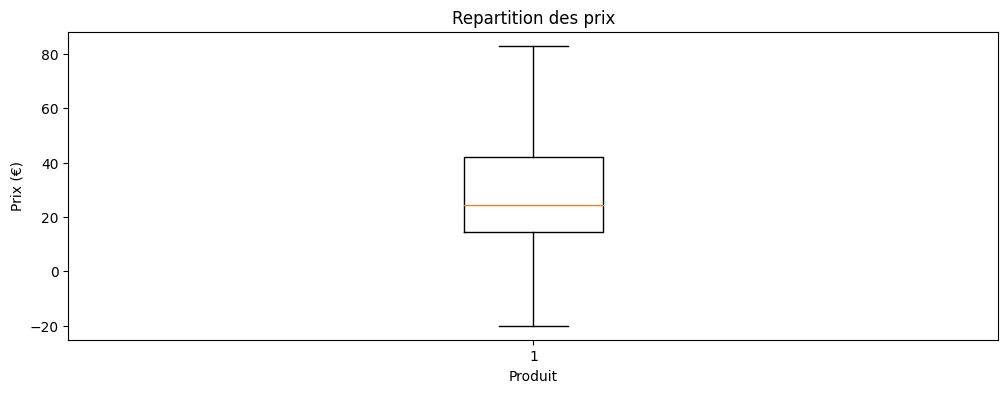

In [64]:
## Plotcharts

# Préparation des données pour le graphique
plt.figure(figsize=(12, 4)) # Taille
plt.boxplot(product_data['price'], showfliers=False)

# Gestion des titres
plt.title("Repartition des prix") # Titre
plt.xlabel('Produit') # Titres des abscisses
plt.ylabel("Prix (€)") # Titres des ordonnées

# Choix des couleurs
colors = sns.color_palette("pastel") # Colors

# Affichage du graphique
plt.show()

In [65]:
## Plotcharts interactifs

# Préparation des données pour le graphique
fig = px.box(product_data, y='price', title='Répartition des prix', labels={'price': 'Prix (€)'}, points = 'all')

# Gestion de l'échelle
fig.update_yaxes(range=[-25, 230]) # Zoom sur les données

# Affichage du graphique
fig.show()

In [68]:
# Etude des mesures de dispersions
product_data['price'].describe()

count    825.000000
mean      32.187697
std       26.712077
min      -20.000000
25%       14.500000
50%       24.300000
75%       42.000000
max      225.000000
Name: price, dtype: float64

In [66]:
## Analyses statistiques

# Calcul de la moyenne des prix
moyenne_prix = product_data['price'].mean()
# Calcul de l'écart-type des prix
ecart_type_prix = product_data['price'].std()
# Calcul du Z-score
Zscore = moyenne_prix / ecart_type_prix

## Résultats
print(f"La moyenne des prix est de {round(moyenne_prix,2)} €.")
print("")
print(f"L'écart type des prix est de {round(ecart_type_prix,2)} €.")
print("")
print(f"Le Z-score est égal à {round(Zscore,2)}, une fois arrondi à 2 chiffres après la virgule.")

La moyenne des prix est de 32.19 €.

L'écart type des prix est de 26.71 €.

Le Z-score est égal à 1.2, une fois arrondi à 2 chiffres après la virgule.


In [67]:
## Détection des outliers grâce au Z_score

# Calcul du Z_score pour chaque observation
product_data['z_score'] = (product_data['price'] - moyenne_prix) / ecart_type_prix

# Sélection des observations dont le Z_score est supérieur ou égale à 3
z_score_3 = product_data[product_data['z_score'] >= 3][['price','z_score']]

# Tri des résultats
z_score_3 = z_score_3.sort_values(by='z_score', ascending = False)

# Aperçu des résultat
print(f"Seuil prix à partir duquel le z-score est supérieur à 3 : {round(z_score_3['price'].min(),2)} €.")
print('')
print(f"Nombre de produits concernés : {z_score_3['z_score'].count() - 1}")
print('')

# Aperçu des observations concernées
z_score_3

Seuil prix à partir duquel le z-score est supérieur à 3 : 114.0 €.

Nombre de produits concernés : 16



,price,z_score
208,225.0,7.218170
460,217.5,6.937398
635,191.3,5.956568
227,176.0,5.383793
598,175.0,5.346357
230,157.0,4.672505
242,144.0,4.185833
411,137.0,3.923780
697,135.0,3.848907
556,124.8,3.467057


In [71]:
## Interval interquartile

# Calcul du premier quartile
Q1 = product_data['price'].describe()['25%']
# Calcul du troisième quartile
Q3 = product_data['price'].describe()['75%']
# Calcul de l'interval interquartile
IQR = Q3 - Q1

# Définition d'un seuil pour sélectionner les valeurs aberrantes/atypiques
seuil_outliers = 1.5 * IQR
# Calcul du seuil inférieur
limite_inferieur = Q1 - seuil_outliers
# Calcul du seuil supérieur
limite_superieur = Q3 + seuil_outliers

# Calcul du nombre total de produit au sein du catalogue
nombre_total_de_produit = product_data['product_id'].count()
# Calcul du nombre d'outliers détéctés
nombre_outliers_iqr = product_data.loc[product_data['price'] >= limite_superieur]['product_id'].count()
# Taux de proportions des outliers au sein du catalogue produit
proportion_outliers = nombre_outliers_iqr/nombre_total_de_produit * 100

# Aperçu des résultats
print(f"La valeur de l'interval interquartile est de : {round(IQR,2)}.")
print("")
print(f"Valeur du seuil inférieur : {round(limite_inferieur,2)} €")
print("")
print(f"Valeur du seuil supérieure : {round(limite_superieur,2)} €")
print("")
print(f"{nombre_outliers_iqr} produits sont considérés comme des outliers suite à l'étude de l'intervale interquartile.")
print("")
print(f"Les outliers représentent donc {round(proportion_outliers,2)} % du catalogue produit.")
print("")
print(f"Soit {nombre_outliers_iqr} produits sur {nombre_total_de_produit}.")
print("")

# Affichage des produits concernés
product_data.loc[product_data['price'] >= limite_superieur][['product_id','price','post_title','product_type']].sort_values(by='price', ascending = False)

La valeur de l'interval interquartile est de : 27.5.

Valeur du seuil inférieur : -26.75 €

Valeur du seuil supérieure : 83.25 €

36 produits sont considérés comme des outliers suite à l'étude de l'intervale interquartile.

Les outliers représentent donc 4.36 % du catalogue produit.

Soit 36 produits sur 825.



,product_id,price,post_title,product_type
208,4352,225.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Champagne
460,5001,217.5,David Duband Charmes-Chambertin Grand Cru 2014,Vin
635,5892,191.3,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,Champagne
227,4402,176.0,Cognac Frapin VIP XO,Cognac
598,5767,175.0,Camille Giroud Clos de Vougeot 2016,Vin
230,4406,157.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Cognac
242,4594,144.0,NaN,NaN
411,4904,137.0,Domaine Des Croix Corton Charlemagne Grand Cru...,Vin
697,6126,135.0,Champagne Gosset Célébris Vintage 2007,Champagne
556,5612,124.8,Domaine Weinbach Gewurztraminer Grand Cru Furs...,Vin


In [72]:
## Contrôle des outliers

# Calcul du prix d'achat moyen des articles
prix_achat_moyen = product_data['purchase_price'].mean()
# Calcul du prix d'achat moyen des outliers
prix_achat_moyen_outliers = product_data.loc[product_data['price'] >= limite_superieur]['purchase_price'].mean()

# Aperçu des résultats
print(f"Le prix d'achat moyen est de {round(prix_achat_moyen,2)} €.")
print("")
print(f"Le prix d'achat moyen des outliers est de {round(prix_achat_moyen_outliers,2)} €.")

Le prix d'achat moyen est de 16.94 €.
Le prix d'achat moyen des outliers est de 64.52 €.


Les prix élevés de ses articles semblent justifiés et cohérents car correspondent à des produits hauts de gammes ( champagne, grands crus, cognac, etc.. ).

Pour preuve, leurs prix d'achat est nettement supérieur à la moyenne du catalogue.

**Il convient cependant de faire remonter l'information auprès du service concerné pour effectuer les vérifications nécessaires.**

## Analyse du chiffre d'affaire

In [80]:
## Chiffre d'affaires

# Calcul du chiffre d'affaire réalisé par produit
product_data['CA_product'] = product_data['price'] * product_data['total_sales']
# Calcul du chiffre d'affaire
chiffre_affaire = product_data['CA_product'].sum()
# Calcul du chiffre d'affaire pour le site web uniquement
only_website = product_data.loc[product_data['onsale_web'] == True]
only_website_ca = only_website['CA_product'].sum()

# Aperçu des résultats
print(f"Le chiffre d'affaire du site web est de {round(only_website_ca,2)} €.")

Le chiffre d'affaire du site web est de 143598.9 €.


In [79]:
## Top 20 des produits en fonction du chiffre d'affaire

# Tri des produits en fonction du chiffre d'affaire
product_data = product_data.sort_values(by='CA_product', ascending=False)
product_data = product_data.reset_index(drop=True)
# Séléction des 20 meilleurs références
top_20_product = product_data.head(20)

## Barcharts

# Préparation des données pour le graphique
fig = px.bar(top_20_product, x='CA_product', y='post_title', title='Top 20 produits en fonction du chiffre d\'affaire réalisé')

# Gestion des titres
fig.update_xaxes(title='Chiffre d\'affaires (€)') # # Titres des abscisses
fig.update_yaxes(title='Produits') # Titres des ordonnées

# Inverser l'ordre d'affichage des produits sur le graphique
fig.update_layout(yaxis={'categoryorder':'total ascending'})

# Affichage du graphique
fig.show()

In [82]:
## Méthode "80/20"

# Calcul de la proportion du chiffre d'affaire réalisé par produit
product_data['%_CA_product'] = product_data['CA_product'] / chiffre_affaire * 100

# Somme cumulative de la proportion de chiffre d'affaire réalisé par produit
product_data['cumul_%_CA'] = product_data['%_CA_product'].cumsum()

# Calcul du nombre d'articles nécessaires pour obtenir 80% du chiffre d'affaire
nombre_article_80_percent_CA = product_data.loc[product_data['cumul_%_CA'] < 80]['product_id'].count()

# Aperçu des résultats
print(f"Il faut {nombre_article_80_percent_CA} articles sur {nombre_total_de_produit} pour obtenir 80% du chiffre d'affaire.")
print(f"Cela représente {round(nombre_article_80_percent_CA / nombre_total_de_produit * 100,2)}% des articles présents sur le site web.")


Il faut 434 articles sur 825 pour obtenir 80% du chiffre d'affaire.
Cela représente 52.61% des articles présents sur le site web.


## Analyse des ventes

In [83]:
## Top 20 des produits en fonction des quantités vendues

# Tri des produits en fonction du chiffre d'affaire
product_data = product_data.sort_values(by='total_sales', ascending=False)
product_data = product_data.reset_index(drop=True)
# Séléction des 20 meilleurs références
top_20_sales = product_data.head(20)

## Barcharts

# Préparation des données pour le graphique
fig = px.bar(top_20_sales, x='total_sales', y='post_title', title='Top 20 produit en fonction du nombre de vente réalisées')

# Gestion des titres
fig.update_xaxes(title='Nombre de ventes') # # Titres des abscisses
fig.update_yaxes(title='Produits') # Titres des ordonnées

# Inverser l'ordre d'affichage des produits sur le graphique
fig.update_layout(yaxis={'categoryorder':'total ascending'})

# Affichage du graphique
fig.show()

In [85]:
## Méthode "80/20"

# Calcul du nombre de ventes total du site internet
total_vente_site = product_data['total_sales'].sum()
# Calcul du taux de proportion des ventes réalisé par produit
product_data['percent_sales'] = product_data['total_sales'] / total_vente_site * 100
# Somme cumulative du taux de proportion des ventes réalisé par produit
product_data['cumul_%_sales'] = product_data['percent_sales'].cumsum()
# Calcul du nombre d'articles nécessaires pour obtenir 80% des ventes
nombre_article_80_percent_sales = product_data.loc[product_data['cumul_%_sales'] < 80]['product_id'].count()

# Aperçu des résultats
print(f"Total des ventes réalisées sur le site internet : {round(total_vente_site.astype(int))} articles.")
print("")
print(f"Il faut {nombre_article_80_percent_sales} articles sur {nombre_total_de_produit} pour obtenir 80% des ventes, en quantité de produits.")
print("")
print(f"Cela représente {round(nombre_article_80_percent_sales / nombre_total_de_produit * 100,2)}% des articles présents sur le site web.")

Total des ventes réalisées sur le site internet : 5751 articles.

Il faut 433 articles sur 825 pour obtenir 80% des ventes, en quantité de produits.

Cela représente 52.48% des articles présents sur le site web.


## Analyse des stocks

In [87]:
## Durée de stockage

# Calcul de la 'rotation des stocks'
product_data['stock_rotation'] =  product_data['stock_quantity'] / product_data['total_sales']
# Remplacement des valeurs infinis par zéro
product_data.loc[product_data['stock_rotation'] == float('inf'), 'stock_rotation'] = 0
# Tri
product_data = product_data.sort_values(by='stock_rotation', ascending=False)
product_data = product_data.reset_index(drop=True)
# Sélection des 20 produits avec la plus longue durée de stock
flop_20_stock = product_data.head(20).sort_values(by='stock_rotation', ascending=True)


## Barcharts

# Préparation des données pour le graphique
fig = px.bar(flop_20_stock, x='stock_rotation', y='post_title', title='Flop 20 produit en fonction de la rotation des stocks')

# Gestion des titres
fig.update_xaxes(title='Durée de stockage') # # Titres des abscisses
fig.update_yaxes(title='Produits') # Titres des ordonnées

# Inverser l'ordre d'affichage des produits sur le graphique
fig.update_layout(yaxis={'categoryorder':'total ascending'})

# Affichage du graphique
fig.show()

In [88]:
## Valorisation des stocks

# Calcul de la 'valorisation des stocks'
product_data['stock_valorisation'] = product_data['stock_quantity'] * product_data['price']
# Calcul de la 'valorisation des stocks' totale
total_stock_valorisation = product_data['stock_valorisation'].sum()

# Aperçu des résulats
print(f"La valorisation totale des stocks s'élève à {total_stock_valorisation} €.")

La valorisation totale des stocks s'élève à 531628.8 €.


In [89]:
## Prévision de la durée des stocks

# Calcul de la quantité totale de produit en stock
total_stock_quantity = product_data['stock_quantity'].sum()
# Calcul du délai prévisionnel de disponiblité produits
delai_stock = total_stock_valorisation / chiffre_affaire

# Aperçu des résulats
print(f"Avec {total_stock_quantity} articles, il reste approximativement {round(delai_stock,1)} mois de stock.")


Avec 17811 articles, il reste approximativement 3.7 mois de stock.


## Analyse du taux de marge

In [92]:
## Prix Hors Taxe

# Calcul du 'prix Hors Taxe'
product_data['price_ht'] = product_data['price'] / 1.20

# Contrôle de conformité des prix de ventes
product_data.loc[product_data['price_ht'] <= 0]

,id_web,product_id,price,purchase_price,stock_status,stock_quantity,onsale_web,post_title,product_type,total_sales,tax_status,post_date,post_modified,_merge,z_score,CA_product,%_CA_product,cumul_%_CA,percent_sales,cumul_%_sales,stock_rotation,stock_valorisation,price_ht
719,NaN,4233,-20.0,10.33,outofstock,0,False,NaN,NaN,NaN,NaN,NaT,NaT,left_only,-1.953712,NaN,NaN,NaN,NaN,NaN,NaN,-0.0,-16.666667
748,NaN,5017,-8.0,4.34,outofstock,0,False,NaN,NaN,NaN,NaN,NaT,NaT,left_only,-1.504477,NaN,NaN,NaN,NaN,NaN,NaN,-0.0,-6.666667
771,NaN,6594,-9.1,4.61,instock,19,False,NaN,NaN,NaN,NaN,NaT,NaT,left_only,-1.545657,NaN,NaN,NaN,NaN,NaN,NaN,-172.9,-7.583333


Ces trois articles ne sont pas en ventes sur le site internet.

**Il convient néanmoins de faire remonter l'information auprès du service concerné.**

In [93]:
## Mise à l'écart des valeurs non conformes
index_to_drop = product_data.loc[product_data['price_ht'] <= 0].index
product_data.drop(index_to_drop, inplace=True)

In [96]:
## Taux de marge

# Calcul du 'taux de marge' pour chaque produit
product_data['taux_marge'] = ((product_data['price_ht'] - product_data['purchase_price']) / product_data['price_ht'] * 100)

# Détection du produit avec le taux de marge minimum
index_taux_min = product_data['taux_marge'].idxmin()
prix_taux_min = product_data.loc[index_taux_min, 'price']

# Détection du produit avec le taux de marge maximum
index_taux_max = product_data['taux_marge'].idxmax()
prix_taux_max = product_data.loc[index_taux_max, 'price']

# Aperçu des résultats
print(f"Le taux de marge minimum réalisé sur un produit au sein du catalogue est de {round(product_data['taux_marge'].min(),2)}%.")
print(f"Le produit possédant le taux de marge minimum à pour prix {prix_taux_min}€.")
print("")
print(f"Le taux de marge maximum réalisé sur un produit au sein du catalogue est de {round(product_data['taux_marge'].max(),2)}%.")
print(f"Le produit avec le taux de marge maximum à pour prix {prix_taux_max}€.")

Le taux de marge minimum réalisé sur un produit au sein du catalogue est de -634.99%.
Le produit possédant le taux de marge minimum à pour prix 12.65€.

Le taux de marge maximum réalisé sur un produit au sein du catalogue est de 47.76%.
Le produit avec le taux de marge maximum à pour prix 62.5€.


Il semble y avoir une anomalie car un taux de marge de -634% est totalement impossible dans les faits.

In [108]:
## Gestion des anomalies Valeur aberrante

# Analyse
product_data.loc[(product_data['taux_marge'] < 0) & (product_data['onsale_web'] == True)]

,id_web,product_id,price,purchase_price,stock_status,stock_quantity,onsale_web,post_title,product_type,total_sales,tax_status,post_date,post_modified,_merge,z_score,CA_product,%_CA_product,cumul_%_CA,percent_sales,cumul_%_sales,stock_rotation,stock_valorisation,price_ht,taux_marge
666,12589,4355,12.65,77.48,instock,97,True,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Champagne,0.0,taxable,2018-03-02,2020-08-13,both,-0.731418,0.0,0.0,100.0,0.0,100.0,0.0,1227.05,10.541667,-634.988142


La référence produit '4355 : Champagne Egly-Ouriet Grand Cru Blanc de Noirs' est disponible sur le site et vendu à perte. Une erreur de prix est à rectifier.

**A voir d'urgence avec le service concerné.**

In [109]:
## Taux de marge

# Produit avec le taux de marge le plus elevé
taux_marge_max_index = product_data.loc[product_data['_merge'] == 'both']['taux_marge'].idxmax()

# Resultat
taux_maxim = pd.DataFrame(product_data.iloc[taux_marge_max_index]).transpose()
print(f"Le prix du produit avec le taux de marge maximum est de {taux_maxim['price'].values[0]}€.")
print('')
taux_maxim

Le prix du produit avec le taux de marge maximum est de 62.5€.



,id_web,product_id,price,purchase_price,stock_status,stock_quantity,onsale_web,post_title,product_type,total_sales,tax_status,post_date,post_modified,_merge,z_score,CA_product,%_CA_product,cumul_%_CA,percent_sales,cumul_%_sales,stock_rotation,stock_valorisation,price_ht,taux_marge
531,3506,4401,62.5,27.21,instock,5,True,Cognac Frapin VSOP,Cognac,3.0,taxable,2018-03-22,2020-08-04,both,1.134779,187.5,0.130498,64.749433,0.052165,98.817597,1.666667,312.5,52.083333,47.7568


In [110]:
## Taux de marge

# Produit avec le taux de marge le moins elevé
taux_marge_min_index = product_data.loc[(product_data['_merge'] == 'both') & (product_data['taux_marge'] >= 0)]['taux_marge'].idxmin()

# Resultat
taux_minim = pd.DataFrame(product_data.iloc[taux_marge_min_index]).transpose()
print(f"Le prix du produit avec le taux de marge minimum est de {taux_minim['price'].values[0]}€.")
print('')
taux_minim

Le prix du produit avec le taux de marge minimum est de 13.1€.



,id_web,product_id,price,purchase_price,stock_status,stock_quantity,onsale_web,post_title,product_type,total_sales,tax_status,post_date,post_modified,_merge,z_score,CA_product,%_CA_product,cumul_%_CA,percent_sales,cumul_%_sales,stock_rotation,stock_valorisation,price_ht,taux_marge
58,11258,5760,13.1,8.43,instock,24,True,Huile d'Olive Extra Vierge Planeta 50cl,Huile d'olive,7.0,taxable,2019-03-13,2020-08-19,both,-0.714572,91.7,0.063822,97.549347,0.121718,78.282038,3.428571,314.4,10.916667,22.778626


In [112]:
## Taux de marge par type de produit

# Liste des types de produits
list_product = product_data['product_type'].unique()
# Calcul de la moyenne de taux de marge réalisé par type de produit
moyenne_taux_marge_par_produit = round(product_data.groupby('product_type')['taux_marge'].mean(),2).reset_index()

# Aperçu des résultats
moyenne_taux_marge_par_produit = moyenne_taux_marge_par_produit.sort_values(by='taux_marge', ascending = False, ignore_index=True)
moyenne_taux_marge_par_produit

,product_type,taux_marge
0,Cognac,45.07
1,Whisky,44.92
2,Gin,42.80
3,Vin,38.01
4,Huile d'olive,25.00
5,Champagne,4.79


In [114]:
## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(moyenne_taux_marge_par_produit, x='product_type', y='taux_marge', title='Taux de marge moyen par produit')

# Gestion des titres
fig.update_xaxes(title='Produits') # # Titres des abscisses
fig.update_yaxes(title='Taux de marge moyen (%)') # Titres des ordonnées

# Affichage du graphique
fig.show()

In [115]:
## Taux de marge par type de produit (Sans la référence problématique)

# Sélection des taux positifs uniquement
tx_positif = product_data[product_data['taux_marge'] > 0]
# Calcul de la moyenne de taux de marge réalisé par type de produit
moyenne_taux_marge_par_produit = round(tx_positif.groupby('product_type')['taux_marge'].mean(),2).reset_index()

# Aperçu des résultats
moyenne_taux_marge_par_produit = moyenne_taux_marge_par_produit.sort_values(by='taux_marge', ascending = False, ignore_index=True)
moyenne_taux_marge_par_produit

,product_type,taux_marge
0,Cognac,45.07
1,Whisky,44.92
2,Gin,42.80
3,Vin,38.01
4,Champagne,28.49
5,Huile d'olive,25.00


In [116]:
## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(moyenne_taux_marge_par_produit, x='product_type', y='taux_marge', title='Taux de marge moyen par produit')

# Gestion des titres
fig.update_xaxes(title='Produits') # # Titres des abscisses
fig.update_yaxes(title='Taux de marge moyen (%)') # Titres des ordonnées

# Affichage du graphique
fig.show()

In [118]:
## Nombre de ventes par types de produits

# Calcul de la moyenne des ventes par type de produit
vente_par_produit = tx_positif.groupby('product_type')['total_sales'].sum().reset_index()

# Aperçu des résultats
vente_par_produit = vente_par_produit.sort_values(by='total_sales', ascending = False, ignore_index=True)
vente_par_produit

,product_type,total_sales
0,Vin,5456.0
1,Champagne,169.0
2,Whisky,48.0
3,Cognac,35.0
4,Huile d'olive,22.0
5,Gin,14.0


In [120]:
## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(vente_par_produit, x='product_type', y='total_sales', title='Nombre de ventes par produit')

# Gestion des titres
fig.update_xaxes(title='Produits') # # Titres des abscisses
fig.update_yaxes(title='Nombre de ventes') # Titres des ordonnées

# Affichage du graphique
fig.show()

## Analyse des corrélations

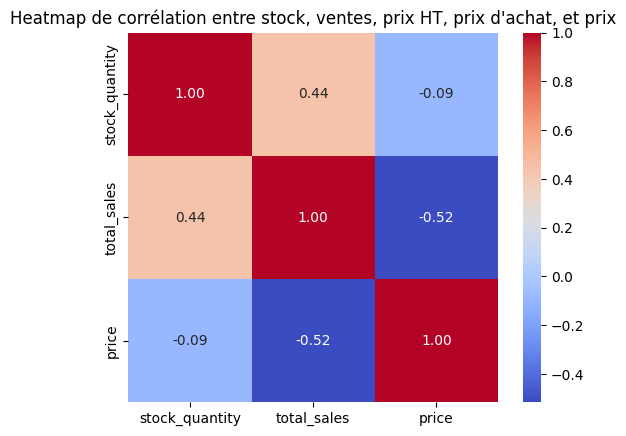

In [121]:
## Analyse des corrélations entre les variables stocks, prix et ventes

# Mise en place d'une matrice de corrélation
correlation_matrix = product_data[['stock_quantity','total_sales', 'price']].corr()

## Heatmap

# Préparation des données pour le graphique
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Gestion du titre
plt.title("Heatmap de corrélation entre stock, ventes, prix HT, prix d'achat, et prix")

# Affichage du graphique
plt.show()

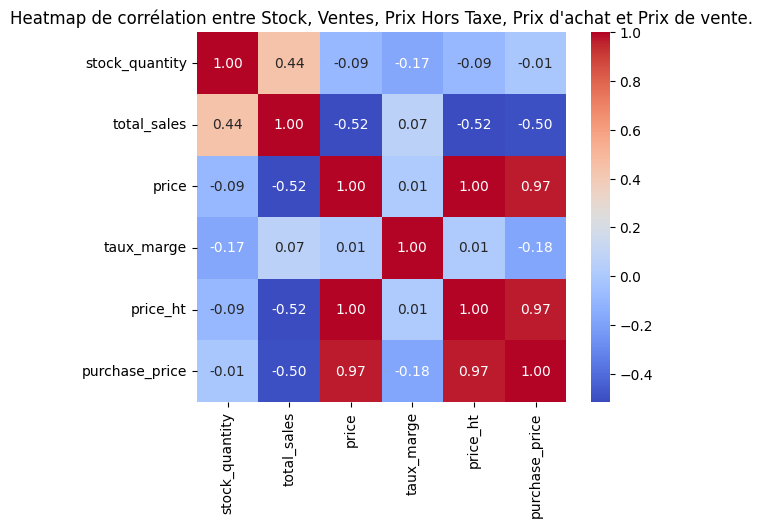

In [122]:
# Mise en place d'une matrice de corrélation
correlation_matrix = product_data[['stock_quantity','total_sales', 'price','taux_marge','price_ht','purchase_price']].corr()

## Heatmap

# Préparation des données pour le graphique
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Gestion du titre
plt.title("Heatmap de corrélation entre Stock, Ventes, Prix Hors Taxe, Prix d'achat et Prix de vente.")

# Affichage du graphique
plt.show()

# Exportation du catalogue produit

In [ ]:
## Exportation
product_data.to_excel('Analyse_Bottleneck.xlsx', index=False)